# tinjauan data

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
import pylab as pl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_excel('Dataset Global Superstore.xlsx')
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium


In [3]:
data.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [4]:
data.shape

(51290, 24)

In [5]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [6]:
data.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [7]:
data = data.drop('Row ID',axis=1)

# filter hanya untuk Segment : Consumer

In [8]:
data['Country'].value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Bahrain             2
Chad                2
Burundi             2
Swaziland           2
South Sudan         2
Name: Country, Length: 147, dtype: int64

In [9]:
data = data[data['Segment'] == 'Consumer']
data.head(4)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
6,IN-2011-81826,2011-11-07,2011-11-09,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,New Zealand,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical


diperhatikan bahwa United States merupakan Country dengan penjualan terbanyak, untuk simplicity diambil Country == 'United States'

In [10]:
data = data[data['Country'] == 'United States']

In [11]:
data.head(4)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
9,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,United States,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical
21,CA-2011-154627,2011-10-29,2011-10-31,First Class,SA-20830,Sue Ann Reed,Consumer,Chicago,Illinois,United States,...,TEC-PH-10001363,Technology,Phones,Apple iPhone 5S,2735.952,6,0.2,341.9940,752.51,High
32,CA-2012-139731,2012-10-15,2012-10-15,Same Day,JE-15745,Joel Eaton,Consumer,Amarillo,Texas,United States,...,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.430,5,0.3,-350.4900,690.42,High


In [12]:
data['Category'].value_counts()

Office Supplies    3127
Furniture          1113
Technology          951
Name: Category, dtype: int64

In [13]:
data['Sub-Category'].value_counts()

Binders        780
Paper          693
Furnishings    494
Phones         451
Storage        450
Art            428
Accessories    408
Chairs         329
Appliances     244
Labels         189
Tables         159
Bookcases      131
Envelopes      129
Fasteners      114
Supplies       100
Machines        57
Copiers         35
Name: Sub-Category, dtype: int64

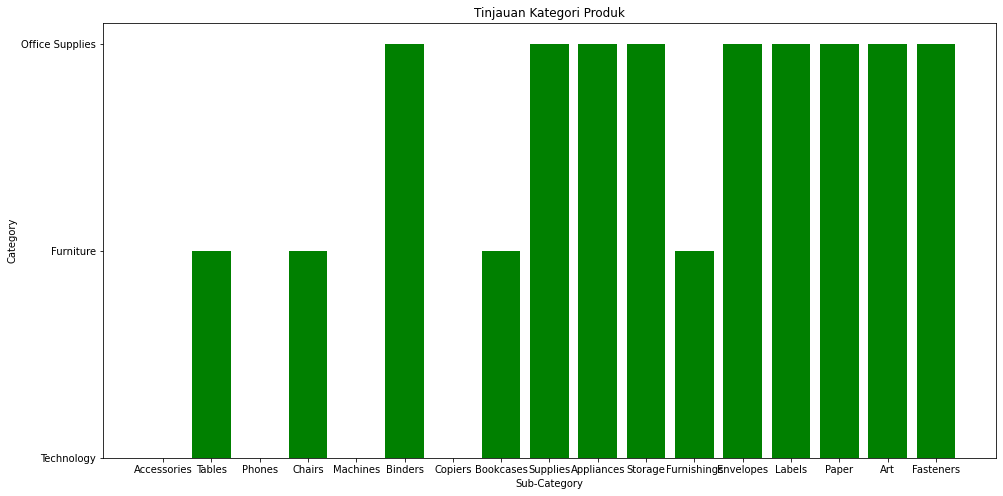

In [14]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=data,color='g')
plt.title("Tinjauan Kategori Produk")
plt.xlabel("Sub-Category")
plt.ylabel("Category")
plt.show()

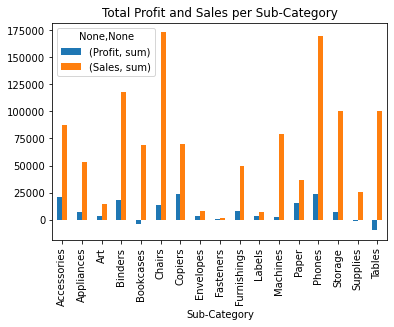

In [15]:
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

In [16]:
data['Product Name'].value_counts()

Staples                                                      115
Storex Dura Pro Binders                                       13
Avery Non-Stick Binders                                       11
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling     10
KI Adjustable-Height Table                                    10
                                                            ... 
Euro Pro Shark Stick Mini Vacuum                               1
TOPS Money Receipt Book, Consecutively Numbered in Red,        1
Epson Perfection V600 Photo Scanner                            1
Lexmark X 9575 Professional All-in-One Color Printer           1
2300 Heavy-Duty Transfer File Systems by Perma                 1
Name: Product Name, Length: 1696, dtype: int64

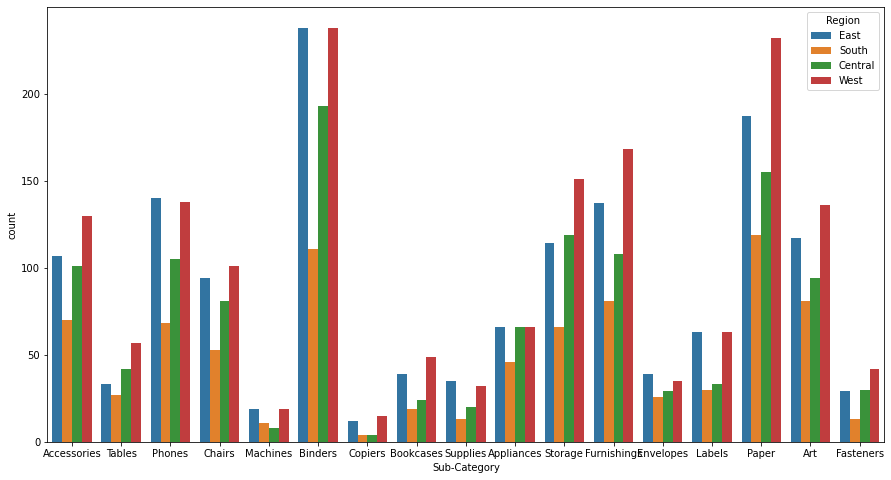

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=data)
plt.show()

In [18]:
data['Cost'] = data['Sales'] - data['Profit']
data['Cost'].head()

0     1547.4655
9     6159.9564
21    2393.9580
32    2803.9200
34    3475.4412
Name: Cost, dtype: float64

In [19]:
data['Profit %'] = (data['Profit']/data['Cost'])*100

In [20]:
data.sort_values(['Profit %','Product Name'],ascending=False).groupby('Profit %').head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Cost,Profit %
22220,CA-2013-135265,2013-07-08,2013-07-10,Second Class,CC-12370,Christopher Conant,Consumer,Los Angeles,California,United States,...,Paper,Xerox 1942,48.940,1,0.0,24.4700,10.36,Critical,24.4700,100.000000
31877,CA-2011-142769,2011-09-13,2011-09-13,Same Day,RP-19390,Resi Pölking,Consumer,Seattle,Washington,United States,...,Paper,Xerox 1942,48.940,1,0.0,24.4700,4.70,High,24.4700,100.000000
22255,CA-2014-145037,2014-09-03,2014-09-08,Second Class,TB-21055,Ted Butterfield,Consumer,Meriden,Connecticut,United States,...,Paper,Xerox 1890,146.820,3,0.0,73.4100,10.33,Medium,73.4100,100.000000
42079,CA-2014-150091,2014-10-13,2014-10-17,Standard Class,NP-18670,Nora Paige,Consumer,Lakewood,New Jersey,United States,...,Fasteners,"OIC Colored Binder Clips, Assorted Sizes",17.900,5,0.0,8.7710,1.80,High,9.1290,96.078431
36281,CA-2013-150350,2013-08-24,2013-08-31,Standard Class,MS-17770,Maxwell Schwartz,Consumer,Seattle,Washington,United States,...,Paper,Xerox 1978,34.680,6,0.0,16.9932,3.21,Medium,17.6868,96.078431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51032,CA-2014-165099,2014-12-12,2014-12-14,First Class,DK-13375,Dennis Kane,Consumer,Abilene,Texas,United States,...,Appliances,Hoover Commercial Lightweight Upright Vacuum,1.392,2,0.8,-3.7584,0.14,High,5.1504,-72.972973
25579,US-2014-125647,2014-09-24,2014-09-29,Standard Class,LC-16870,Lena Cacioppo,Consumer,Chicago,Illinois,United States,...,Appliances,Euro Pro Shark Stick Mini Vacuum,73.176,6,0.8,-197.5752,7.83,Medium,270.7512,-72.972973
51114,US-2014-160836,2014-09-12,2014-09-17,Standard Class,CC-12475,Cindy Chapman,Consumer,Houston,Texas,United States,...,Appliances,Commercial WindTunnel Clean Air Upright Vacuum...,1.556,2,0.8,-4.2012,0.11,Medium,5.7572,-72.972973
48626,US-2014-119438,2014-03-19,2014-03-24,Standard Class,CD-11980,Carol Darley,Consumer,Tyler,Texas,United States,...,Appliances,Hoover Portapower Portable Vacuum,2.688,3,0.8,-7.3920,0.62,High,10.0800,-73.333333


In [21]:
customer_top10=data['Customer Name'].value_counts().head(10)
customer_top10

William Brown          37
John Lee               34
Chloris Kastensmidt    32
Seth Vernon            32
Emily Phan             31
Zuschuss Carroll       31
Arthur Prichep         31
Lena Cacioppo          30
Greg Tran              29
Ken Lonsdale           29
Name: Customer Name, dtype: int64

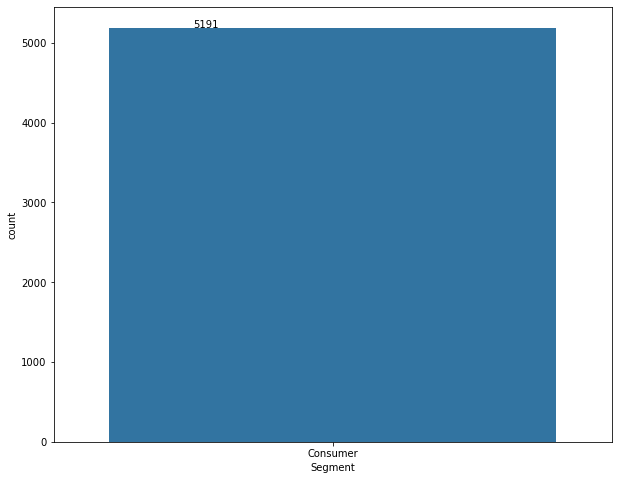

In [22]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = data)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

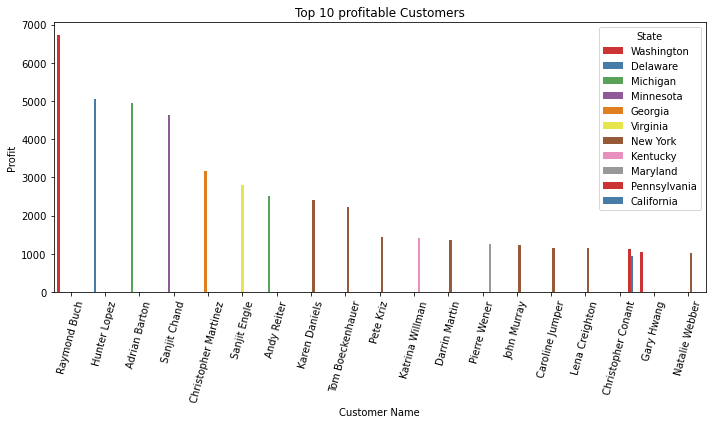

In [23]:
#top 10 customers
sortedTop10 = data.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='State',palette='Set1', data=sortedTop10, ax=ax)
ax.set_title("Top 10 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

In [24]:
data['Shipment Duration']=(pd.to_datetime(data['Ship Date'])-pd.to_datetime(data['Order Date'])).dt.days
data['Shipment Duration']

0        0
9        3
21       2
32       0
34       2
        ..
51257    3
51269    1
51270    5
51277    5
51286    4
Name: Shipment Duration, Length: 5191, dtype: int64

In [25]:
def agg_customer(x):
    d = []
    d.append(x['Order ID'].count())
    d.append(x['Sales'].sum())
    d.append(x['Profit %'].mean())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['Product Name'].unique())
    d.append(x['City'].unique())
    return pd.Series(d, index=['#Purchases','Total_Sales','Average Profit % gained','First_Purchase_Date','Latest_Purchase_Date','Products Purchased','Location_Count'])

In [26]:
df_agg = data.groupby('Customer ID').apply(agg_customer)
df_agg

,#Purchases,Total_Sales,Average Profit % gained,First_Purchase_Date,Latest_Purchase_Date,Products Purchased,Location_Count
Customer ID,,,,,,,
AA-10315,11,5563.560,44.527461,2011-03-31,2014-06-30,"[High Speed Automatic Electric Letter Opener, ...","[Round Rock, San Francisco, Minneapolis, New Y..."
AA-10375,15,1056.390,52.349415,2011-04-21,2014-12-12,"[Logitech diNovo Edge Keyboard, Kensington Sli...","[Atlanta, Omaha, New York City, Lebanon, Provi..."
AA-10480,12,1790.512,55.580242,2011-05-04,2014-04-16,"[Hon 4060 Series Tables, NETGEAR AC1750 Dual B...","[Detroit, Springfield, Middletown, Concord]"
AA-10645,18,5086.935,42.364755,2011-06-22,2014-11-06,"[Atlantic Metals Mobile 5-Shelf Bookcases, Cus...","[San Francisco, Oklahoma City, Chester, Lowell..."
AB-10015,6,886.156,15.186975,2011-02-19,2013-11-11,"[Samsung Convoy 3, Sauder Facets Collection Li...","[Oklahoma City, Seattle, Arlington]"
...,...,...,...,...,...,...,...
VS-21820,8,1055.981,-26.473274,2011-01-08,2014-05-24,"[Global High-Back Leather Tilter, Burgundy, Ho...","[Naperville, Huntsville, Raleigh, Los Angeles]"
WB-21850,37,6160.102,23.563879,2011-11-04,2014-12-11,"[GBC DocuBind TL200 Manual Binding Machine, Ho...","[Los Angeles, Anaheim, Redmond, Philadelphia, ..."
XP-21865,28,2374.658,53.799227,2011-01-21,2014-11-18,[Deflect-o DuraMat Antistatic Studded Beveled ...,"[Hollywood, Athens, Los Angeles, Westland, Eve..."


In [27]:
data['order year'] = data['Order Date'].dt.year
data['order year'].head()

0     2012
9     2012
21    2011
32    2012
34    2011
Name: order year, dtype: int64

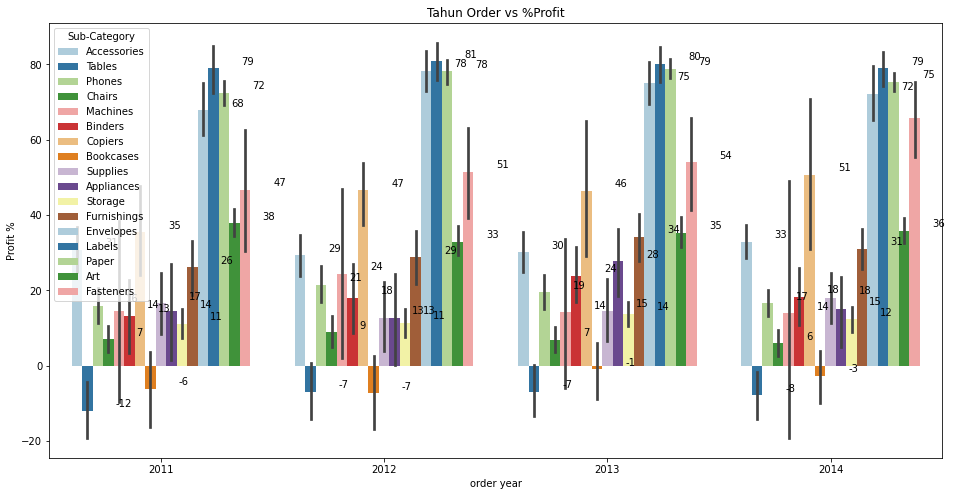

In [28]:
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('order year','Profit %',hue='Sub-Category',palette='Paired',data=data)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.title("Tahun Order vs %Profit")    
plt.show()

Text(0.5, 1.0, 'Year wise Total Sales & % of profit gained')

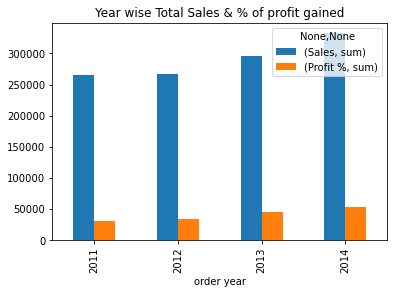

In [29]:
data.groupby('order year')['Sales','Profit %'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')

# segmentasi customers using simple rfm

In [30]:
df_RFM = data.groupby('Customer ID').agg({'Order Date': lambda y: (data['Order Date'].max().date() - y.max().date()).days,
                                        'Order ID': lambda y: len(y.unique()),  
                                        'Sales': lambda y: round(y.sum(),2)})
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
df_RFM = df_RFM.sort_values('Monetary', ascending=False)
df_RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
RB-19360,96,6,15117.34
AB-10105,41,10,14473.57
KL-16645,47,12,14175.23
SC-20095,349,9,14142.33
HL-15040,43,6,12873.30


In [31]:
quantiles = df_RFM.quantile(q=[0.8])
print(quantiles)
df_RFM['R']=np.where(df_RFM['Recency']<=int(quantiles.Recency.values), 2, 1)
df_RFM['F']=np.where(df_RFM['Frequency']>=int(quantiles.Frequency.values), 2, 1)
df_RFM['M']=np.where(df_RFM['Monetary']>=int(quantiles.Monetary.values), 2, 1)
df_RFM.head()

     Recency  Frequency  Monetary
0.8    222.2        8.0   4070.17


,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
RB-19360,96,6,15117.34,2,1,2
AB-10105,41,10,14473.57,2,2,2
KL-16645,47,12,14175.23,2,2,2
SC-20095,349,9,14142.33,1,2,2
HL-15040,43,6,12873.30,2,1,2


In [32]:
df_RFM['RMScore'] = df_RFM.M.map(str)+df_RFM.R.map(str)

In [33]:
df_RFM.reset_index(level=0, inplace=True)

In [34]:
df_RFM

,Customer ID,Recency,Frequency,Monetary,R,F,M,RMScore
0,RB-19360,96,6,15117.34,2,1,2,22
1,AB-10105,41,10,14473.57,2,2,2,22
2,KL-16645,47,12,14175.23,2,2,2,22
3,SC-20095,349,9,14142.33,1,2,2,21
4,HL-15040,43,6,12873.30,2,1,2,22
...,...,...,...,...,...,...,...,...
404,AR-10570,534,1,88.15,1,1,1,11
405,JC-15340,114,4,71.26,2,1,1,12
406,LB-16735,48,3,50.19,2,1,1,12
407,RE-19405,1098,1,48.36,1,1,1,11


In [35]:
df_RFM.RMScore.unique()

array(['22', '21', '12', '11'], dtype=object)

In [36]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  409 non-null    object 
 1   Recency      409 non-null    int64  
 2   Frequency    409 non-null    int64  
 3   Monetary     409 non-null    float64
 4   R            409 non-null    int32  
 5   F            409 non-null    int32  
 6   M            409 non-null    int32  
 7   RMScore      409 non-null    object 
dtypes: float64(1), int32(3), int64(2), object(2)
memory usage: 20.9+ KB


In [37]:
df_RFM['RMScore'] = df_RFM['RMScore'].astype(int)

# k-means clustering

In [41]:
from sklearn.preprocessing import StandardScaler
X = df_RFM.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.25877915, -0.1271903 ,  4.75343384, ..., -0.62542503,
         1.99694889,  2.01435833],
       [-0.57077599,  1.44919854,  4.50419244, ...,  1.59891267,
         1.99694889,  2.01435833],
       [-0.53673997,  2.23739296,  4.3886874 , ...,  1.59891267,
         1.99694889,  2.01435833],
       ...,
       [-0.5310673 , -1.30948192, -1.07995013, ..., -0.62542503,
        -0.50076394, -0.44349536],
       [ 5.42523597, -2.09767634, -1.08065863, ..., -0.62542503,
        -0.50076394, -0.68928073],
       [ 1.22178766, -1.70357913, -1.09751167, ..., -0.62542503,
        -0.50076394, -0.68928073]])

In [42]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# berapa clusternya seharusnya?

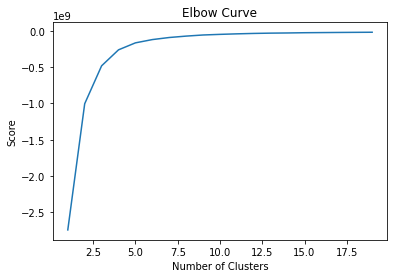

In [43]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

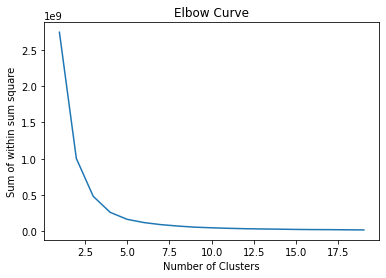

In [45]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Sum of within sum square')
pl.title('Elbow Curve')
pl.show()

In [44]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


# kesimpulan

In [46]:
df_RFM["Kategori"] = labels
df_RFM.head(5)

,Customer ID,Recency,Frequency,Monetary,R,F,M,RMScore,Kategori
0,RB-19360,96,6,15117.34,2,1,2,22,2
1,AB-10105,41,10,14473.57,2,2,2,22,2
2,KL-16645,47,12,14175.23,2,2,2,22,2
3,SC-20095,349,9,14142.33,1,2,2,21,2
4,HL-15040,43,6,12873.30,2,1,2,22,2


In [51]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  409 non-null    object 
 1   Recency      409 non-null    int64  
 2   Frequency    409 non-null    int64  
 3   Monetary     409 non-null    float64
 4   R            409 non-null    int32  
 5   F            409 non-null    int32  
 6   M            409 non-null    int32  
 7   RMScore      409 non-null    int32  
 8   Kategori     409 non-null    int32  
dtypes: float64(1), int32(5), int64(2), object(1)
memory usage: 20.9+ KB


In [50]:
df_RFM.groupby('Kategori').mean().sort_values(by='Monetary', ascending=False)

,Recency,Frequency,Monetary,R,F,M,RMScore
Kategori,,,,,,,
2,120.461538,8.846154,12465.109231,1.769231,1.692308,2.000000,21.769231
1,104.754717,8.207547,6324.487547,1.905660,1.471698,2.000000,21.905660
3,121.403846,6.897436,3044.626154,1.833333,1.346154,1.102564,12.858974
0,170.401070,5.133690,1011.740321,1.743316,1.144385,1.000000,11.743316


In [52]:
def kategori(x):
    if x == 2:
        return 'Platinum'
    elif x == 1:
        return 'Gold'
    elif x == 3:
        return 'Silver'
    else:
        return 'Bronze'

In [53]:
df_RFM['Kategori'] = df_RFM['Kategori'].apply(kategori)

In [54]:
df_RFM['Kategori'].unique()

array(['Platinum', 'Gold', 'Silver', 'Bronze'], dtype=object)

In [55]:
df_RFM.head(3)

,Customer ID,Recency,Frequency,Monetary,R,F,M,RMScore,Kategori
0,RB-19360,96,6,15117.34,2,1,2,22,Platinum
1,AB-10105,41,10,14473.57,2,2,2,22,Platinum
2,KL-16645,47,12,14175.23,2,2,2,22,Platinum


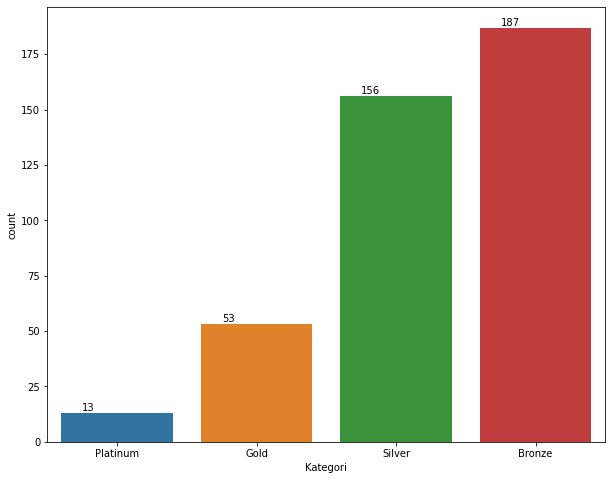

In [56]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Kategori', data = df_RFM)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()